In [1]:
import os
import numpy as np
import pandas as pd
import time as tm
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("visa_alltime.csv")
df['time']=pd.to_datetime(df['time'])
df['month'] = [t.strftime("%B") for t in df['time']]
df['year'] = [t.strftime("%Y") for t in df['time']]
df['count_sqrt'] = np.sqrt(df['count'])
df['count_log'] = np.log(df['count']+0.001)

In [15]:
df.iloc[df['count'].idxmax()]

nationality                 MEXICO
visa                         BBBCC
count                       205108
time           2025-01-31 00:00:00
type                             N
month                      January
year                          2025
count_sqrt              452.888507
count_log                12.231292
Name: 487009, dtype: object

In [4]:
df_agg_visa=df.pivot_table(
    index = ['year','type','nationality'], 
    values = 'count', 
    aggfunc = 'sum').reset_index()

In [5]:
df_agg_visa.head()

,year,type,nationality,count
0,2017,I,AFGHANISTAN,14430
1,2017,I,ALBANIA,3360
2,2017,I,ALGERIA,1478
3,2017,I,ANGOLA,55
4,2017,I,ANGUILLA,10


# Univariate Distribution

## `sns.stripplot()`

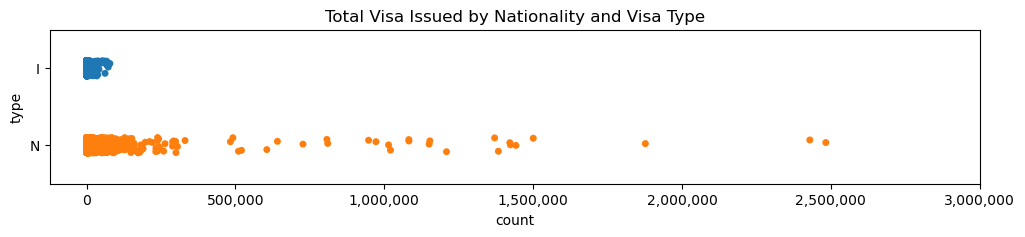

In [33]:
plt.figure(figsize=(12, 2))
plt.ticklabel_format(style='plain')
sns.stripplot(data=df_agg_visa, x="count", y="type", jitter=True, orient="h", hue = "type")
current_values = plt.gca().get_xticks() # extract the default ticks
# count is non-negative, filter out negative values in the array
plt.xticks(current_values[current_values>=0]) # add this step to avoid warning
# consistently reflect the non-negative count x-ticks in their formats
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values[current_values>=0]])
plt.title("Total Visa Issued by Nationality and Visa Type")
plt.show()

In [32]:
current_values[current_values>=0]

array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
       3000000.])

## Histogram

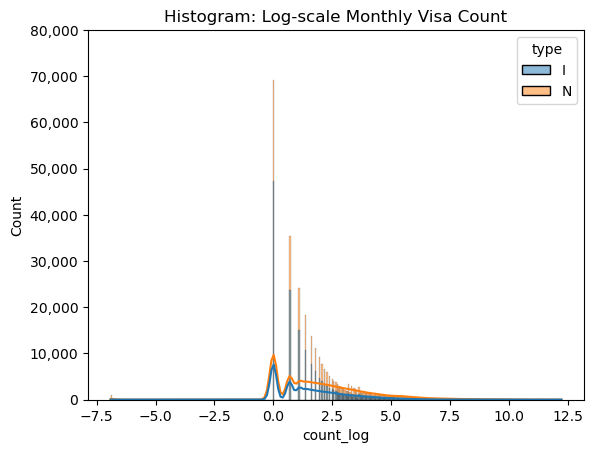

In [25]:
sns.histplot(data = df, x = 'count_log', kde=True, hue = "type")
current_values = plt.gca().get_yticks()
plt.yticks(current_values) # add this step to avoid warning
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.title('Histogram: Log-scale Monthly Visa Count')
plt.show()

In [ ]:
# to be continued